Note: This Colab notebook contains the codes I used for the three tasks. The code does not show the desired animations on Colab but if used in Pycharm with all the necessary imported modules as suggested on the instruction, they worked.
# Answers to the prompted questions are under the relevant codes for each core task

In [ ]:
# Exercise 1: All the animations were run in Pycharm
# Answers to the prompted questions are under the relevant codes for each core task

import numpy as np
import matplotlib.pyplot as plt
import matplotlib; matplotlib.use("TkAgg")
import matplotlib.animation as animation

# Let's define the parameters

# physics
v = 10.0 ** (-1)  # advection speed

# domain
x_min = -5.0
x_max = 5.0


# initial condition using object
class Gaussian:
    def __init__(self, center=0.0, width=1.0, amplitude=1.0):
        self.center = center
        self.width = width
        self.amplitude = amplitude

    def __call__(self, x):
        return self.amplitude * np.exp(- (x - self.center) ** 2 / (2 * self.width ** 2))


gaussian = Gaussian()
# gaussian is a function that can take a scalar and return a scalar,
# or take a numpy array and return a numpy array

# let's see what the initial condition looks like

X_example = np.linspace(x_min, x_max, 10 ** 2, endpoint=True)
f0_example = gaussian(X_example)

fig = plt.figure()
ax = fig.gca()

ax.set_xlim(x_min, x_max)
ax.set_ylim(-0.1, 1.5)

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$f_{0}(x)$')

plt.plot(X_example, f0_example, 'b--')

plt.show()

# Core Task 1

# Let's define the parameters
# grid
n_points_space = 10 ** 3
dx = (x_max - x_min) / n_points_space
dt = 0.1


def Upwind_explicit(v, n_points_space, dx, dt):
    df_dt = np.zeros(n_points_space, dtype=np.float64)

    def step(f):
        df_dt = -v * (f[:] - np.roll(f, 1)) / dx  # TO BE DONE

        f[:] += dt * df_dt

    return step


# initial condition
X = np.linspace(x_min, x_max, n_points_space, endpoint=True)
f0 = gaussian(X)
f = f0.copy()

# scheme
step = Upwind_explicit(v, n_points_space, dx, dt)

# preparation of the animation
fig = plt.figure()
ax = fig.gca()

ax.set_xlim(x_min, x_max)
ax.set_ylim(-0.1, 1.5)

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$f(x, t)$')

show_f0, = ax.plot(X, f0, 'b--', label="f0")
show_ft, = ax.plot([], [], 'b', lw=1, ms=2, label="f")
time = ax.annotate(0, xy=(3, 1.4), xytext=(3, 1.4))


# integration
def animate(i):
    step(f)

    show_ft.set_data(X, f)
    t_update = v * i * dt / (x_max - x_min)
    time.set_text("t / T = %.2f" % t_update)

    return show_ft, time


# creation of the animation
anim = animation.FuncAnimation(fig, animate, 10 ** 5, interval=dt * 10, blit=True)

# show the results

plt.show()


# Explore the errors made by your code. What happens if you wait for a few periods?
# Ans: The wave solutions move with speed v as expected.
# Run the same code, but with a larger dt of 1.1. What happens?
# Ans : as dt increases the graph blows up after certain time... easily noticeable at dt = 0.11 agree with the formula --> unstable solution


In [ ]:
# Core task 2

# Let's define the parameters

# physics
v = 10.0 ** (-1)  # advection speed

# domain
x_min = -5.0
x_max = 5.0


# initial condition using object
class Gaussian:
    def __init__(self, center=0.0, width=1.0, amplitude=1.0):
        self.center = center
        self.width = width
        self.amplitude = amplitude

    def __call__(self, x):
        return self.amplitude * np.exp(- (x - self.center) ** 2 / (2 * self.width ** 2))


gaussian = Gaussian()
# Let's define the parameters
# grid
n_points_space = 10 ** 3
dx = (x_max - x_min) / n_points_space
dt = 0.005

def Lax_Wendroff(v, n_points_space, dx, dt):
    df_dt = np.zeros(n_points_space, dtype=np.float64)
    def step(f):
        f[:] = dt * -(v * (np.roll(f, -1) - np.roll(f, 1)) / (2 * dx)) + v ** 2 * dt * (
                    np.roll(f, -1) - 2 * f[:] + np.roll(f, -1)) / (2 * dx ** 2)
        f[:] += dt * df_dt
        # TO BE DONE

    return step

# initial condition
X = np.linspace(x_min, x_max, n_points_space, endpoint=True)
f0 = gaussian(X)
f = f0.copy()

# scheme
step = Lax_Wendroff(v, n_points_space, dx, dt)

# preparation of the animation
fig = plt.figure()
ax = fig.gca()

ax.set_xlim(x_min, x_max)
ax.set_ylim(-0.1, 1.5)

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$f(x, t)$')

show_f0, = ax.plot(X, f0, 'b--', label="f0")
show_ft, = ax.plot([], [], 'b', lw=1, ms=2, label="f")
time = ax.annotate(0, xy=(3, 1.4), xytext=(3, 1.4))


# integration
def animate(i):
    step(f)

    show_ft.set_data(X, f)
    t_update = v * i * dt / (x_max - x_min)
    time.set_text("t / T = %.2f" % t_update)

    return show_ft, time


# creation of the animation
anim = animation.FuncAnimation(fig, animate, 10 ** 5, interval=dt * 10, blit=True)

# show the results
plt.show()

#BLOWS UP IMMEDIATELY for dt bigger than 0.01, and 0.005 is a good dt to observe instability
# Ans: Stability seems to have direct proportionality to dt but (dx)**(-2) 
#FIND LIMITS THAT THE RESULTS ARE STABLE
# Ans: dt smaller than 0.005
# Ans: Lax-Wendroff is diffusive (the amplitude of the solution dropped compared to the original solution)

<ipython-input-5-d067ffc460bf>:33: RuntimeWarning: overflow encountered in multiply
  np.roll(f, -1) - 2 * f[:] + np.roll(f, -1)) / (2 * dx ** 2)
<ipython-input-5-d067ffc460bf>:33: RuntimeWarning: overflow encountered in subtract
  np.roll(f, -1) - 2 * f[:] + np.roll(f, -1)) / (2 * dx ** 2)
<ipython-input-5-d067ffc460bf>:33: RuntimeWarning: overflow encountered in add
  np.roll(f, -1) - 2 * f[:] + np.roll(f, -1)) / (2 * dx ** 2)
<ipython-input-5-d067ffc460bf>:32: RuntimeWarning: invalid value encountered in subtract
  f[:] =  -(dt* v * (np.roll(f, -1) - np.roll(f, 1)) / (2 * dx)) + v ** 2 * dt * (
<ipython-input-5-d067ffc460bf>:32: RuntimeWarning: invalid value encountered in add
  f[:] =  -(dt* v * (np.roll(f, -1) - np.roll(f, 1)) / (2 * dx)) + v ** 2 * dt * (
<ipython-input-5-d067ffc460bf>:32: RuntimeWarning: overflow encountered in add
  f[:] =  -(dt* v * (np.roll(f, -1) - np.roll(f, 1)) / (2 * dx)) + v ** 2 * dt * (
<ipython-input-5-d067ffc460bf>:32: RuntimeWarning: overflow encoun

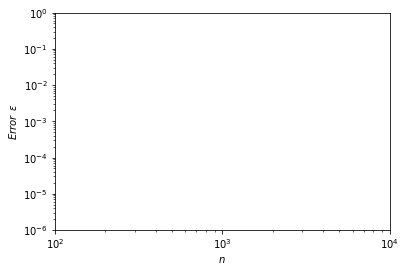

In [5]:
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib; matplotlib.use("TkAgg")
#import matplotlib.animation as animation

# Let's define the parameters

# physics
v = 10.0 ** (-1)  # advection speed

# domain
x_min = -5.0
x_max = 5.0


# initial condition using object
class Gaussian:
    def __init__(self, center=0.0, width=1.0, amplitude=1.0):
        self.center = center
        self.width = width
        self.amplitude = amplitude

    def __call__(self, x):
        return self.amplitude * np.exp(- (x - self.center) ** 2 / (2 * self.width ** 2))


gaussian = Gaussian()

def Lax_Wendroff(v, n_points_space, dx, dt):
    
    def step(f):
        f[:] =  -(dt* v * (np.roll(f, -1) - np.roll(f, 1)) / (2 * dx)) + v ** 2 * dt * (
                    np.roll(f, -1) - 2 * f[:] + np.roll(f, -1)) / (2 * dx ** 2)
         
        # TO BE DONE

    return step

N = [(i + 1) * 10 ** 2 for i in range(10)] + [(i + 1) * 10 ** 3 for i in range(10)]
Errors = [0.0 for i in range(20)]

for i in range(20):
    n = N[i]

    # grid
    n_points_space = n
    dx = (x_max - x_min) / n_points_space
    n_points_time = 2 * n
    dt = 100 / n_points_time

    # initial condition
    X = np.linspace(x_min, x_max, n_points_space, endpoint=True)
    f0 = gaussian(X)
    f = f0.copy()

    # scheme
    step = Lax_Wendroff(v, n_points_space, dx, dt)

    # integration
    t = 0.0
    for j in range(n_points_time):
        step(f)
        t += dt

    # measure error
    error = np.max(np.abs(f - f0))
    Errors[i] = error

# plot the results
fig = plt.figure()
ax = fig.gca()

ax.set_xlim(N[0], N[-1])
ax.set_ylim(10 ** (-6), 10 ** 0)

ax.set_xlabel(r'$n$')
ax.set_ylabel(r'$Error \,\,\, \epsilon$')

ax.set_xscale('log')
ax.set_yscale('log')

plt.plot(N, Errors, 'b')

plt.show()

#Compare to the error made by the other scheme, which scheme do I prefer?
#Ans: I couldn't get the plots to show any non-zero errors for some reason

In [ ]:
#Core Task 3
import numpy as np
import matplotlib.pyplot as plt
import matplotlib; matplotlib.use("TkAgg")
import matplotlib.animation as animation

# Let's define the parameters

# physics
v = 10.0 ** (-1)  # advection speed

# domain
x_min = -5.0
x_max = 5.0


# initial condition using object
class Gaussian:
    def __init__(self, center=0.0, width=1.0, amplitude=1.0):
        self.center = center
        self.width = width
        self.amplitude = amplitude

    def __call__(self, x):
        return self.amplitude * np.exp(- (x - self.center) ** 2 / (2 * self.width ** 2))


gaussian = Gaussian()

#grid
n_points_space = 10 ** 1
dx = (x_max - x_min) / n_points_space
dt = 0.1

def Spectral(v, n_points_space, dx, dt):
    def step(f):
        ft = np.fft.fft(f)
        k = np.fft.fftfreq(n_points_space, dx)
        ft[:] *= 1 - 1j * v * k * dt # Backward Euler method
        f[:] = np.fft.ifft(ft)

        # TO BE DONE

    return step

# initial condition
X = np.linspace(x_min, x_max, n_points_space, endpoint=True)
f0 = gaussian(X)
f = f0.copy()

# scheme
step = Spectral(v, n_points_space, dx, dt)

# preparation of the animation
fig = plt.figure()
ax = fig.gca()

ax.set_xlim(x_min, x_max)
ax.set_ylim(-0.1, 1.5)

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$f(x, t)$')

show_f0, = ax.plot(X, f0, 'b--', label="f0")
show_ft, = ax.plot([], [], 'b', lw=1, ms=2, label="f")
time = ax.annotate(0, xy=(3, 1.4), xytext=(3, 1.4))


# integration
def animate(i):
    step(f)

    show_ft.set_data(X, f)
    t_update = v * i * dt / (x_max - x_min)
    time.set_text("t / T = %.2f" % t_update)

    return show_ft, time


# creation of the animation
anim = animation.FuncAnimation(fig, animate, 10 ** 5, interval=dt * 10, blit=True)

# show the results
plt.show()

def Spectral(v, n_points_space, dx, dt):

    def step(f):
        ft=np.fft.fft(f)
        k = np.fft.fftfreq(n_points_space,dx)
        ft[:] *= 1/(1+1j*v*k*dt)
        f[:] = np.fft.ifft(ft)
        
        # TO BE DONE
    
    return step

''' 1.Stability conditions 
- The Backward solution ft[:] *= 1/(1+1j*v*k*dt) gives stable solution for all dt
- The Explicit formula ft[:] *= 1-1j*v*k*dt gives unstable solution for all dt 
2. Convergence rate increases as dt increases and vice versa 
3.What happens for 10 cells in space
Ans: The solutions are stable even for bigger dt but the resolutions of the solution become low-resolution.'''